# 项目：可视化帕默群岛企鹅数据

## 分析目标

此数据分析报告的目的是对帕默群岛上企鹅样本的相关变量进行可视化，从而探索和分析种类、性别、所在岛屿等因素，与企鹅的身体属性，包括体重、嘴峰长度和深度、鳍的长度，之间的关系。

三个分类变量和四个数值变量之间的关系（这些变量都是列名）
索引是334个企鹅样本


## 简介

原始数据`Penguins.csv`包括334个收集自南极洲帕尔默群岛的3个岛屿上的企鹅样本，以及企鹅相关属性数据，包括种类名、所在岛、嘴峰长度、嘴峰深度、鳍长度、体重、性别。

`Penguins.csv`每列的含义如下：
- species：企鹅的种类
- island：企鹅所在岛
- culmen_length_mm：企鹅嘴峰的长度（单位为毫米）
- culmen_depth_mm：企鹅嘴峰的深度（单位为毫米）
- flipper_length_mm：企鹅鳍的长度（单位为毫米）
- body_mass_g：企鹅体重（单位为克）
- sex：企鹅性别

## 导入数据

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
s1 = pd.read_csv("penguins.csv")
s1.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


### 复制数据

In [3]:
s2 = s1.copy()
s2.head(10)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,MALE
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


## 评估和清理数据

干净度判别
1.每行只有一个观察值
2.每列只有一个变量名
3.每空只有一个数值
这是符合标准的
info只用于评判干净度的

#### 评估缺失值

In [4]:
s2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


这里要进行缺失值和数据类型评估

数据类型没有问题，sex可以变成种类变量

缺失值处理，看缺失值是不是都是在同一个企鹅上

种类变量转换

In [5]:
s2["sex"] = s2["sex"].astype("category")#岛屿和企鹅种类也是转换
s2["species"] = s2["species"].astype("category")
s2["island"] = s2["island"].astype("category")
s2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            344 non-null    category
 1   island             344 non-null    category
 2   culmen_length_mm   342 non-null    float64 
 3   culmen_depth_mm    342 non-null    float64 
 4   flipper_length_mm  342 non-null    float64 
 5   body_mass_g        342 non-null    float64 
 6   sex                334 non-null    category
dtypes: category(3), float64(4)
memory usage: 12.3 KB


In [6]:
s2[s2["culmen_length_mm"].isnull()]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


证明在同个企鹅上体现

In [7]:
s2.dropna(subset = ["culmen_length_mm"],inplace = True)
s2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 342 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            342 non-null    category
 1   island             342 non-null    category
 2   culmen_length_mm   342 non-null    float64 
 3   culmen_depth_mm    342 non-null    float64 
 4   flipper_length_mm  342 non-null    float64 
 5   body_mass_g        342 non-null    float64 
 6   sex                334 non-null    category
dtypes: category(3), float64(4)
memory usage: 14.7 KB


这里删除多了，sex有很多没有具体值，其他只是两个

sex不影响数据分析结果，不用理会

#### 评估重复值

In [8]:
s2.duplicated().sum()

0

#### 评估不一致值
可能是species和island and sex

In [9]:
s2["species"].value_counts()

species
Adelie       151
Gentoo       123
Chinstrap     68
Name: count, dtype: int64

In [10]:
s2["island"].value_counts()

island
Biscoe       167
Dream        124
Torgersen     51
Name: count, dtype: int64

In [11]:
s2["sex"].value_counts()

sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64

需要进行删除

In [12]:
s2 = s2[s2["sex"] != "."]
s2["sex"].value_counts()

sex
MALE      168
FEMALE    165
.           0
Name: count, dtype: int64

In [13]:
s2["sex"]

0        MALE
1      FEMALE
2      FEMALE
4      FEMALE
5        MALE
        ...  
338    FEMALE
340    FEMALE
341      MALE
342    FEMALE
343      MALE
Name: sex, Length: 341, dtype: category
Categories (3, object): ['.', 'FEMALE', 'MALE']

待会看一下ans怎么操作的这里

答案

In [14]:
s2['sex'] = s2['sex'].cat.remove_categories('.')

In [15]:
s2["sex"].value_counts()

sex
MALE      168
FEMALE    165
Name: count, dtype: int64

#### 评估无效值

In [16]:
s2.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,341.000000,341.000000,341.000000,341.000000
mean,43.920235,17.155425,200.868035,4199.780059
std,5.467516,1.976124,14.055255,802.300201
min,32.100000,13.100000,172.000000,2700.000000
25%,39.200000,15.600000,190.000000,3550.000000
50%,44.400000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


应该没有什么问题

## 数据可视化

In [17]:
sns.set_palette("bright")

In [18]:
s2

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


### 企鹅所属种类比例

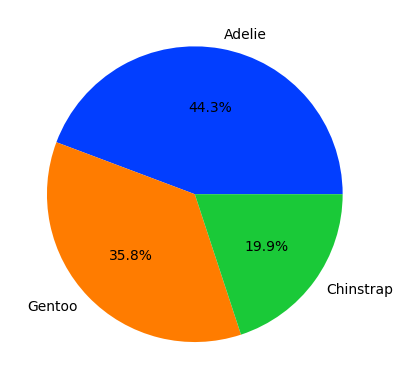

In [19]:
species_count = s2["species"].value_counts()
plt.pie(species_count,autopct = "%.1f%%",labels = species_count.index)
plt.show()

### 企鹅所属岛屿比例

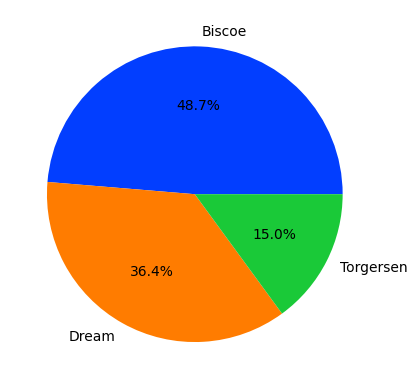

In [20]:
island_count = s2["island"].value_counts()
plt.pie(island_count,autopct = "%.1f%%",labels = island_count.index)
plt.show()

### 企鹅所属性别比例

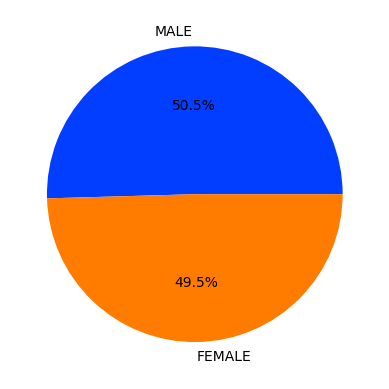

In [21]:
sex_count = s2["sex"].value_counts()
plt.pie(sex_count,autopct = "%.1f%%",labels = sex_count.index)
plt.show()

### 不同岛上的企鹅种类数量

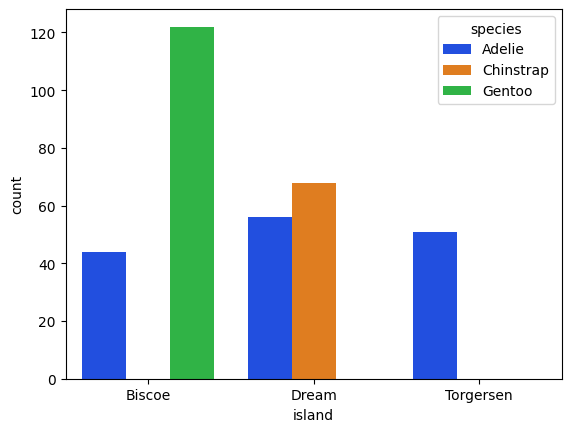

In [22]:
sns.countplot(s2,x = "island",hue = "species")
plt.show()

### 不同岛上的性别种类数量

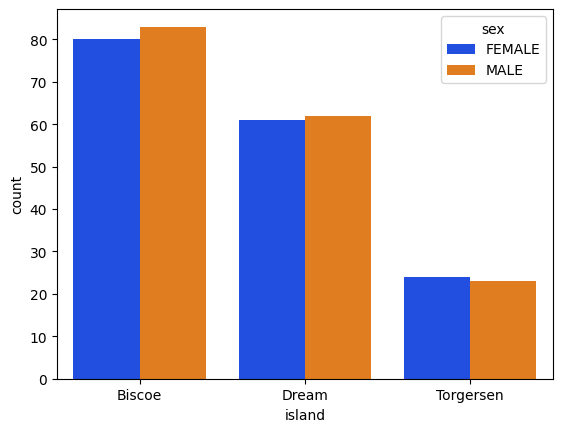

In [23]:
sns.countplot(s2,x = "island",hue = "sex")
plt.show()

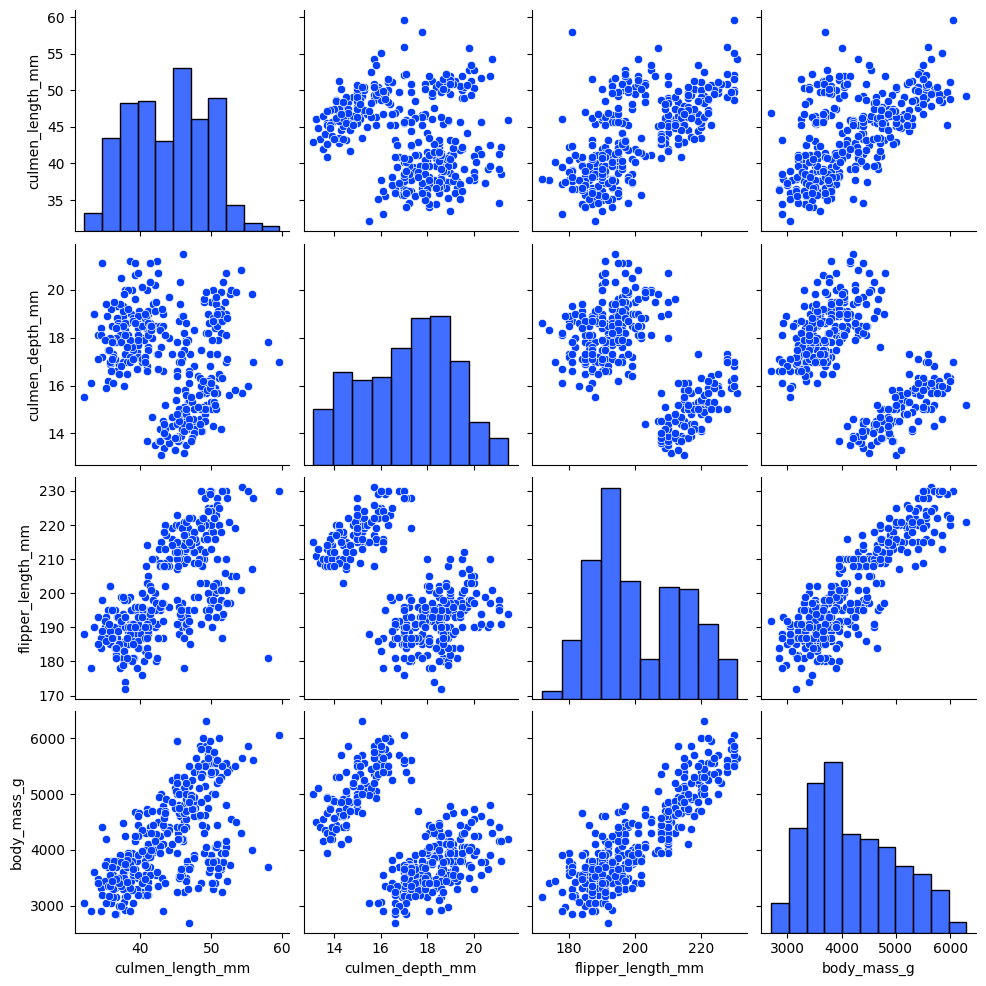

In [24]:
sns.pairplot(s2)
plt.show()

从直方图来看，企鹅样本的嘴峰长度、嘴峰深度、鳍长度、体重的分布不是正态分布。一方面说明，这里面可能包含了多组存在差异的样本数据，另一方面也说明样本数不够大。

另外可以在散点图中看出明显的多个集群，可能与某些因素有关，比如企鹅种类、性别，因此可以对对比进行进一步的分类。

#### 根据种类查看数值之间的相关关系

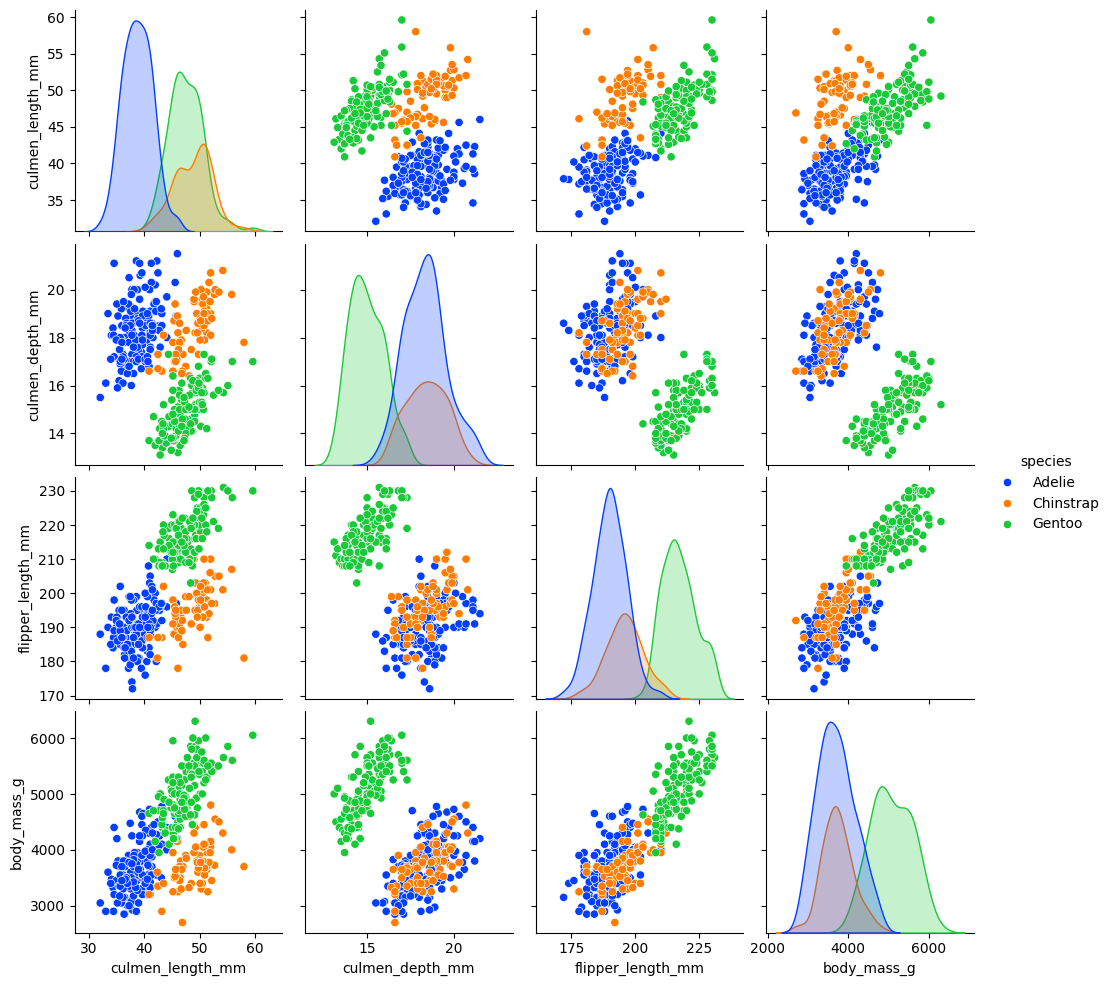

In [25]:
sns.pairplot(s2,hue = "species")
plt.show()

同一种类的企鹅样本数据，在散点图上基本都聚在一起，说明同一种类的企鹅在嘴峰长度、嘴峰深度、鳍长度、体重之间关系上，存在相似性。这些发现有利于我们根据体重、鳍长等数值推测企鹅种类，也可以根据企鹅种类推测体重、鳍长等数值。

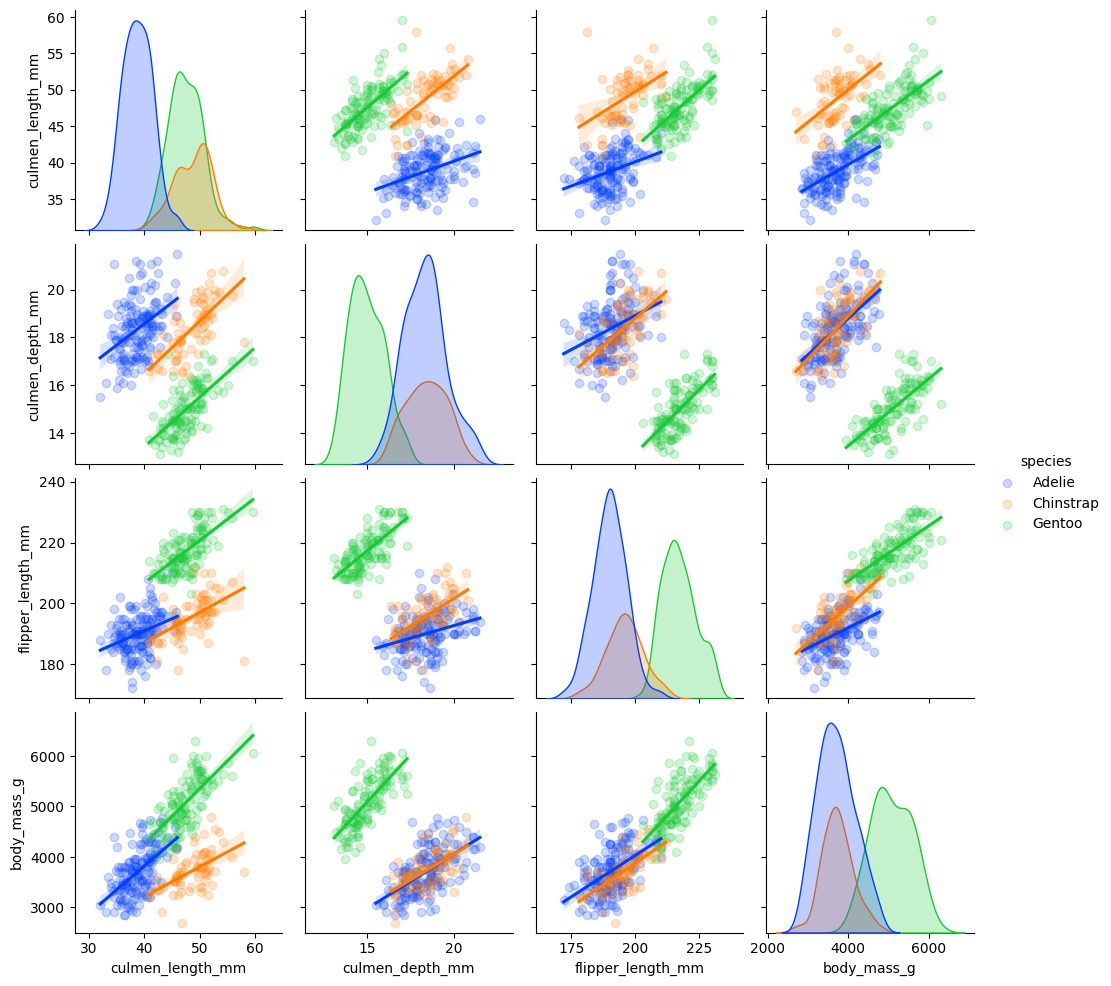

In [26]:
sns.pairplot(s2,hue = "species",kind = "reg",plot_kws= {"scatter_kws":{"alpha":0.2}})
plt.show()

散点图结合线性回归线来看，同类企鹅的属性数据之间均呈线性正比，即嘴峰越长，嘴峰越深，鳍越长，体重越重，嘴峰越短，嘴峰越浅，鳍越短，体重越轻。
从密度图的分布来看，可以得到以下关于样本的发现：
- Chinstrap和Gentoo的嘴峰长度范围较为接近，而Adelie的嘴峰长度更短。
- Adelie和Chinstrap的嘴峰深度范围较为接近，而Gentoo的嘴峰深度更短。
- Adelie的鳍长度最短，Chinstrap中等，而Gentoo的鳍长度嘴长。
- Adelie和Chinstrap的体重范围较为接近，而Gentoo的体重更大。

但不同种类的属性数值否存在统计显著性差异，仍然需要进行假设检验后才能得到结论。

#### 根据性别查看数值之间的相关关系

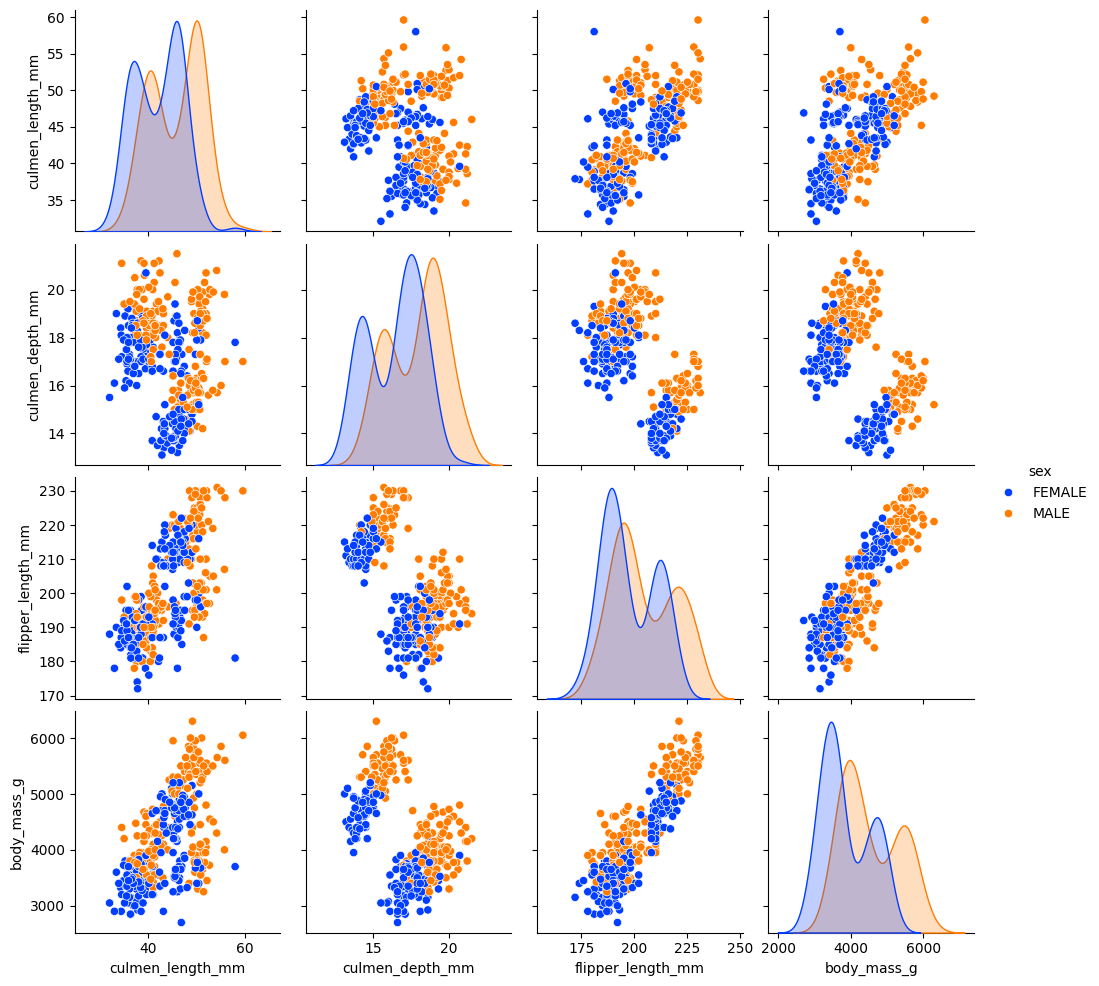

In [27]:
sns.pairplot(s2,hue = "sex")
plt.show()

根据性别划分后可以看出，样本中雄性企鹅在各项属性数值方面大于雌性企鹅。

## 

## 